In [2]:
import numpy as np
#import pandas as pd    #  Mostly not needed, numpy has all the required functionalities
import matplotlib.pyplot as plt

In [36]:
x = np.random.normal(0, 1, 1000)
y = np.array(np.random.binomial(1, 1/(1+np.exp(3+2*x)), 1000)).reshape((1000, 1))

n = len(x) # Number of elements in X
X = np.column_stack((np.repeat(1, n), x))


# Initialization
n = np.shape(X)[0]
p = np.shape(X)[1]

L = 0.1  # The learning Rate

Total_itr = 10000  # The number of iterations to perform gradient descent

beta = np.zeros((p,1))

Xb = X.dot(beta)

pvec = np.array(1/(1+np.exp(Xb)))

ind0 = 1*(Xb > 20)
ind1 = 1*(Xb < - 20)

if(np.sum(ind0)):
    pvec[ind0==1] = 0.00000001
if(np.sum(ind1)):  
    pvec[ind1==1] = 0.99999999

lossold = -np.sum(np.multiply(y,np.log(pvec))+np.multiply((1-y), np.log(1-pvec)))/n
lossnew = lossold

alpha = 0

lossvec = np.zeros((Total_itr,1))

# Performing Gradient Descent 
for itr in range(Total_itr): 
    beta0 =beta
    lossold = lossnew
    
    derivbeta =  np.array((1/n)*np.dot(np.transpose(X), y-pvec))
    beta = beta0 - L*derivbeta
    
    Xb = X.dot(beta)
    ind0 = 1*(Xb > 20)
    ind1 = 1*(Xb < - 20)
    
    pvec = 1/(1+np.exp(Xb)) # Update the probability with new beta
    
    if(np.sum(ind0)):
        pvec[ind0==1] = 0.00000001
    if(np.sum(ind1)):  
        pvec[ind1==1] = 0.99999999
        
    lossnew = -np.sum(np.multiply(y,np.log(pvec))+np.multiply((1-y), np.log(1-pvec)))/n
    
    L1 = L
    changeL = 0
    
    # Implementation of Section 5.2 from the notes 
    while(lossnew > lossold -alpha * L1*np.sum(derivbeta**2)):
        changeL = changeL + 1
        L1 = L1/2 #Reducing the step size
        
        beta = beta0 - L1*derivbeta
    
        Xb = X.dot(beta)
        ind0 = 1*(Xb > 20)
        ind1 = 1*(Xb < - 20)
    
        pvec = 1/(1+np.exp(Xb)) # Update the probability with new beta
    
        if(np.sum(ind0)):
            pvec[ind0==1] = 0.00000001
        if(np.sum(ind1)):  
            pvec[ind1==1] = 0.99999999
            
        lossnew = -np.sum(np.multiply(y,np.log(pvec))+np.multiply((1-y), np.log(1-pvec)))/n
        
        if(changeL > 20):
            beta = beta0 #Could not update, so old value reassigned
            break;
    lossvec[itr] = lossold
print (beta)

[[2.82248374]
 [1.79648492]]


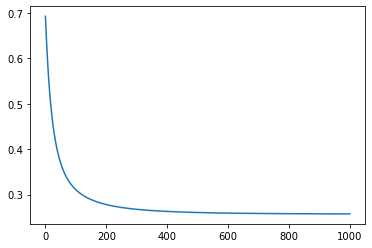

In [37]:
plt.plot(lossvec)